### Contexto
Empresa de servicios financieros localizada en Argentina solicita un análisis e informe sobre criptomonedas para evaluar la posibilidad de invertir en estos activos.

### Fuente de Datos 
- Origen [CoinGecko] https://www.coingecko.com
- Período analizado 22-08-2018 - 22-08-2023
- Criterio de selección de tokens
    - Mayor volúmen 
    - Mayor Capitalización de Mercado
    - Se descartaron StableCoins (monedas atadas al valor de una moneda fiat u otro activo), ya que las más utilizadas no representan un atractivo a la hora de invertir
    - Se descartaron monedas similares
    - Se seleccionaron 10 monedas para realizar el análisis


### Monedas seleccionadas
 1. **AAVE-Eth-v1** ![Alt text](src/aave.png)
 2. **Bitcoin** ![Alt text](src/btc.png)
 3. **Ethereum** ![Alt text](src/eth.png)
 4. **Binancecoin** ![Alt text](src/bnb.png)
 5. **Staked-Ether** ![Alt text](src/stke.png)
 6. **Cardano** ![Alt text](src/ada.png)
 7. **Dogecoin** ![Alt text](src/doge.png)
 8. **Solana** ![Alt text](src/sol.png)
 9. **Tron** ![Alt text](src/trx.png)
10. **PolkaDot** ![Alt text](src/dot.png)


In [80]:
import pandas as pd

df = pd.read_csv('data/cotizaciones.csv')
df.info()
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15852 entries, 0 to 15851
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   prices         15852 non-null  float64
 1   market_caps    15852 non-null  float64
 2   total_volumes  15852 non-null  float64
 3   id_coin        15852 non-null  object 
 4   date           15852 non-null  object 
dtypes: float64(3), object(2)
memory usage: 619.3+ KB


,prices,market_caps,total_volumes
count,15852.000000,1.585200e+04,1.585200e+04
mean,2895.517427,7.564093e+10,5.808011e+09
std,9090.943529,1.780712e+11,1.195223e+10
min,0.001000,0.000000e+00,6.217976e+01
25%,0.076750,3.801698e+09,1.954646e+08
50%,0.932500,1.079193e+10,9.344784e+08
75%,275.808250,3.585555e+10,4.068293e+09
max,67617.016000,1.278798e+12,1.788941e+11


La ausencia de valores nulos nos hace pensar que los datos han sido obtenidos de una fuente bastante confiable. Si bien los valores mínimos y máximos se alejan mucho de la media, dada la variedad de monedas y conocimiento de algunas de ellas, podemos asumir que son valores correctos.

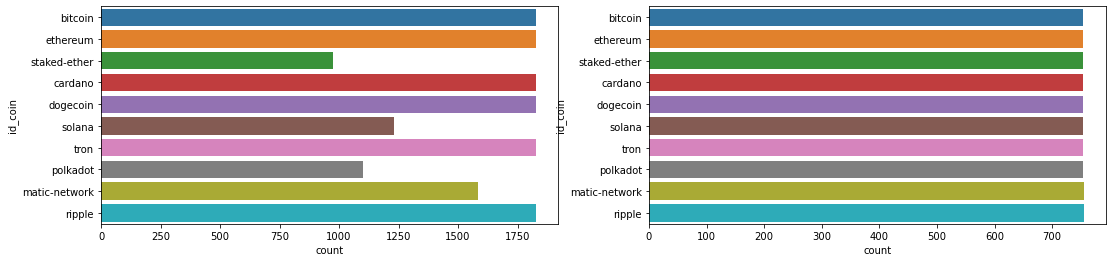

id_coin
bitcoin          1827
cardano          1827
dogecoin         1827
ethereum         1827
ripple           1827
tron             1827
matic-network    1582
solana           1231
polkadot         1101
staked-ether      976
dtype: int64

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot
fig, ax =plt.subplots(1,2)
fig.set_figwidth(18)
sns.countplot(y = df.id_coin, ax=ax[0])
sns.countplot(y = df[df.date>='2021-08-01'].id_coin, ax=ax[1])
plt.show()
df.value_counts('id_coin')


Podemos observar que no hay datos faltantes, si no que algunas monedas fueron creadas después de la fecha que tomamos como inicio para el análisis


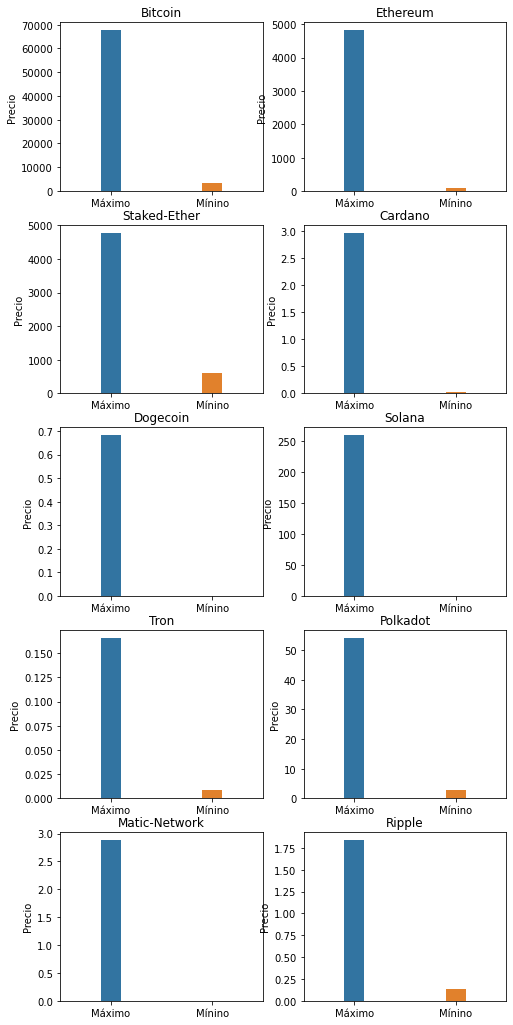

In [106]:
df2 = pd.read_csv('data/monedas.csv')
fig, ax = plt.subplots(5,2)
fig.set_figwidth(8)
fig.set_figheight(18)

i = j = 0
for c in list(df2.id_coin):
    sns.barplot(df2[df2.id_coin==c], ax=ax[j, i], width=0.2).set(title=c.title())

    ax[j, i].set_xticklabels(['Máximo', 'Mínino'])
    ax[j,i].set_ylabel('Precio')
    if i==1:
        i = 0
        j += 1
    else:
        i +=  1     

plt.show()



Podemos observar que los precios máximos y mínimos son muy distantes, lo que nos da una clara idea de la volatilidad de este tipo de activos.

In [83]:
# Agrego fechas faltantes con valor 0 para las monedas que no cubren todo el período
# Para poder graficar mejor

coins_counts = df.value_counts('id_coin').to_dict()
start = df.date.min()
# 5 años 
dias = 365 * 5 + 1

for key, value in coins_counts.items():
    if value<dias:
        faltantes = dias - value + 1 
        rows = [{'prices': 0.0, 'market_caps': 0.0, 'total_volumes': 0.0, 'id_coin': key}]*faltantes
        df_tmp = pd.DataFrame(rows)
        df_tmp['date'] = (pd.date_range(start=start, 
                                     periods=df_tmp.shape[0], 
                                     freq='D'))
        
        df = pd.concat([df_tmp, df], ignore_index=True)


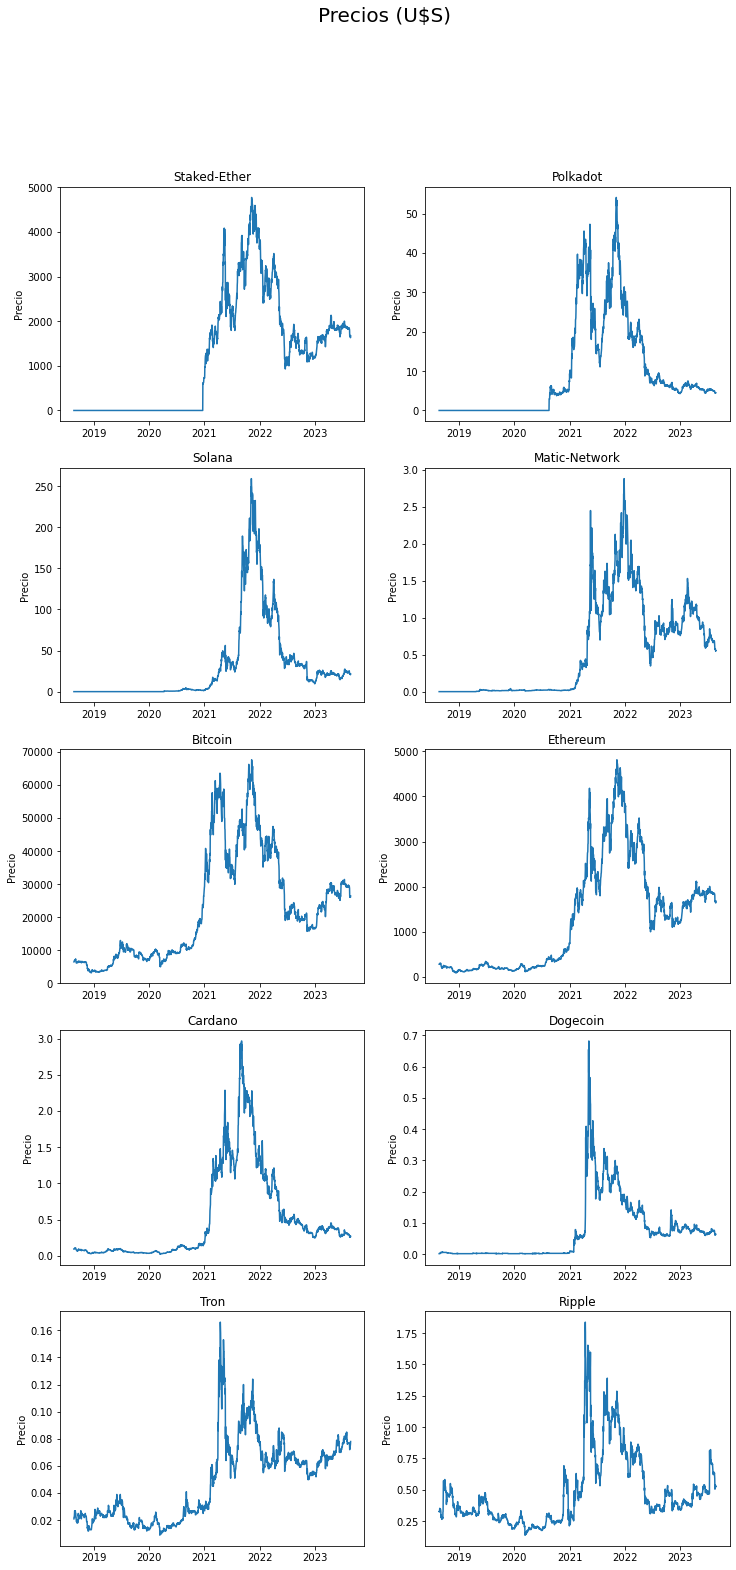

In [117]:
fig, ax = plt.subplots(5,2)
fig.set_figwidth(12)
fig.set_figheight(25)
fig.suptitle('Precios (U$S)', fontsize=20)


df['date'] = pd.to_datetime(df['date'])


i = j = 0
coins = list(df.id_coin.unique())
for c in coins:
    sns.lineplot(data=df[df.id_coin==c], x="date", y="prices", ax=ax[j, i]).set(title=c.title())


    ax[j,i].set_xlabel('')
    ax[j,i].set_ylabel('Precio')

    if i==1:
        i = 0
        j += 1
    else:
        i +=  1     

plt.show()



Podemos observar que el precio todas las monedas analizadas tienen un comportamiento similar, con sus valores más altos durante el año 2021 y una abrupta caída a mediados del 2022. Desde mediados de 2022 hasta la fecha, nos encontramos en lo que se denomina el invierno cripto o criptoinvierno, generado principalmente por la quiebra de algunas plataformas de criptomonedas, cuestiones legales y el contexto político y económico internacional.

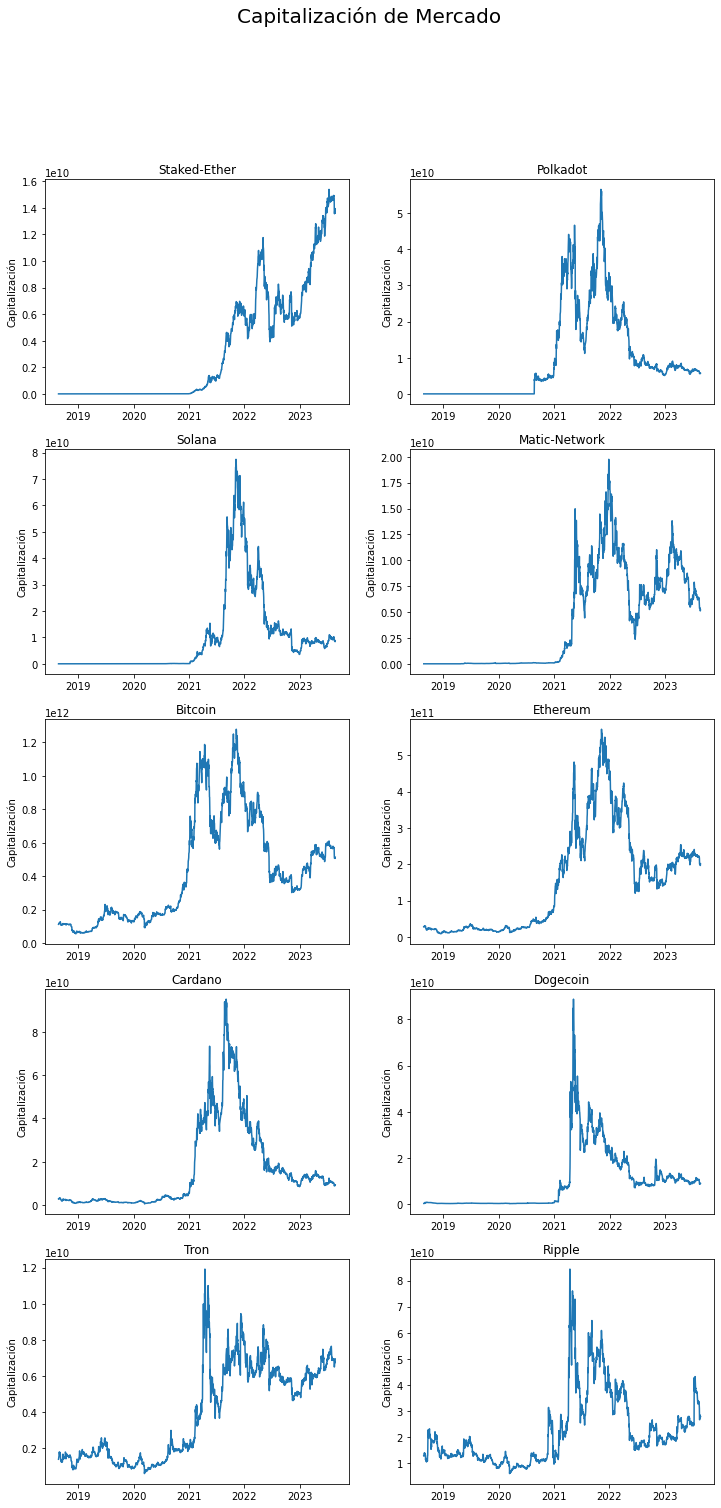

In [116]:
fig, ax = plt.subplots(5,2)
fig.set_figwidth(12)
fig.set_figheight(24)
fig.suptitle('Capitalización de Mercado', fontsize=20)



df['date'] = pd.to_datetime(df['date'])


i = j = 0
coins = list(df.id_coin.unique())
for c in coins:
    sns.lineplot(data=df[df.id_coin==c], x="date", y="market_caps", ax=ax[j, i]).set(title=c.title())


    ax[j,i].set_xlabel('')
    ax[j,i].set_ylabel('Capitalización')

    if i==1:
        i = 0
        j += 1
    else:
        i +=  1     

plt.show()





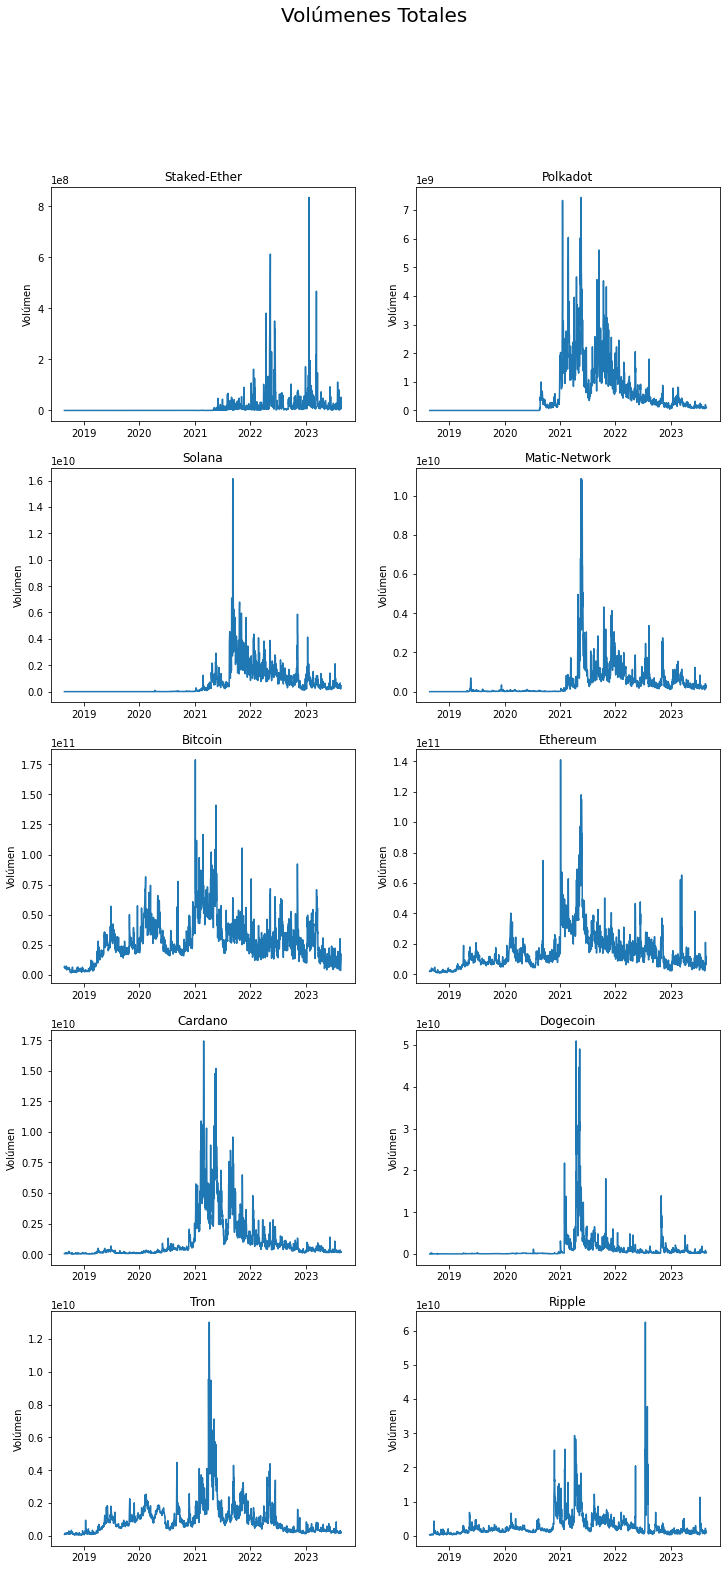

In [118]:
fig, ax = plt.subplots(5,2)
fig.set_figwidth(12)
fig.set_figheight(25)
fig.suptitle('Volúmenes Totales', fontsize=20)


df['date'] = pd.to_datetime(df['date'])


i = j = 0
coins = list(df.id_coin.unique())
for c in coins:
    sns.lineplot(data=df[df.id_coin==c], x="date", y="total_volumes", ax=ax[j, i]).set(title=c.title())


    ax[j,i].set_xlabel('')
    ax[j,i].set_ylabel('Volúmen')

    if i==1:
        i = 0
        j += 1
    else:
        i +=  1     

plt.show()

